# Lorenz Equations

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

In [24]:
%matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy .integrate.odeint` to compute the solution.

In [25]:
def lorenz(x,t):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        x ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    sig = 10
    rho = 28
    beta = 8./3
    
    dx = sig * (x[1] - x[0])
    dy = rho * x[0] - x[1] - (x[0] * x[2])
    dz = (x[0] * x[1]) - beta * x[2]
    
    return np.array([dx, dy, dz])

<IPython.core.display.Javascript object>


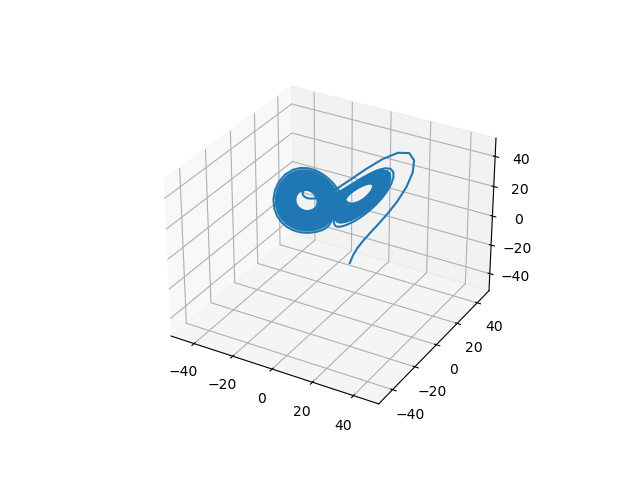

In [26]:
x0 = np.random.uniform(-15, 15, 3)
t_span = np.linspace(0, 50, 3000)

sol = odeint(lorenz, x0, t_span)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_zlim(-50, 50)

ax.plot(sol[:,0], sol[:,1], sol[:,2])
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


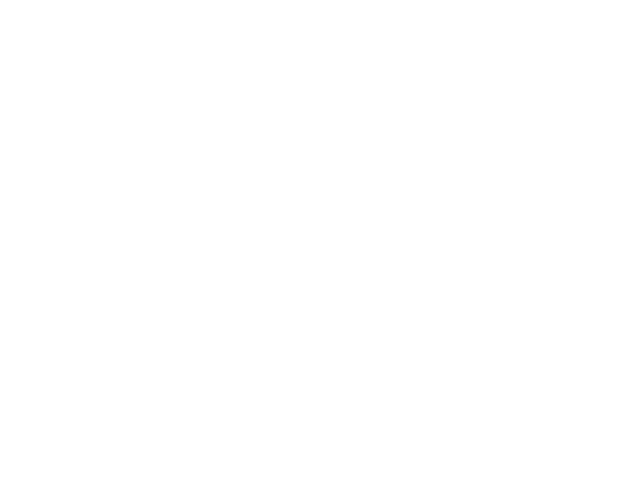

In [27]:
x0_1 = np.random.uniform(-15, 15, 3)
x0_2 = np.random.uniform(-15, 15, 3)
x0_3 = np.random.uniform(-15, 15, 3)

t_span = np.linspace(0, 50, 2000)

sol_1 = odeint(lorenz, x0_1, t_span)
sol_2 = odeint(lorenz, x0_2, t_span)
sol_3 = odeint(lorenz, x0_3, t_span)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_zlim(-50, 50)

animation.writer = animation.writers['ffmpeg']
plt.ioff()

traj_1, = plt.plot([],[],[], color = 'tab:blue', label = "Solution 1")
pos_1,  = plt.plot([],[],[], 'o-', color = 'tab:blue')
traj_2, = plt.plot([],[],[], color = 'tab:orange', label = "Solution 2")
pos_2,  = plt.plot([],[],[], 'o-', color = 'tab:orange')
traj_3, = plt.plot([],[],[], color = 'tab:green', label = "Solution 3")
pos_3,  = plt.plot([],[],[], 'o-', color = 'tab:green')

def update(i):
    pos_1.set_data(sol_1[i, 0], sol_1[i, 1])
    pos_1.set_3d_properties(sol_1[i, 2])
    traj_1.set_data(sol_1[:i, 0], sol_1[:i, 1])
    traj_1.set_3d_properties(sol_1[:i, 2])
    pos_2.set_data(sol_2[i, 0], sol_2[i, 1])
    pos_2.set_3d_properties(sol_2[i, 2])
    traj_2.set_data(sol_2[:i, 0], sol_2[:i, 1])
    traj_2.set_3d_properties(sol_2[:i, 2])
    pos_3.set_data(sol_3[i, 0], sol_3[i, 1])
    pos_3.set_3d_properties(sol_3[i, 2])
    traj_3.set_data(sol_3[:i, 0], sol_3[:i, 1])
    traj_3.set_3d_properties(sol_3[:i, 2])
    
    return pos_1, traj_1, pos_2, traj_2, pos_3, traj_3

plt.legend()
ani1 = animation.FuncAnimation(fig, update, frames=range(len(sol_1[:, 0])), interval=10)
ani1.save('lorenz_animation.mp4')
plt.close()

<video src="lorenz_animation.mp4" controls>

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [28]:
x0_1 = np.random.uniform(-15, 15, 3)
x0_2 = x0_1 + np.random.randn(3)*(1e-10)
x0_3 = x0_1 + np.random.randn(3)*(1e-10)

t_span = np.linspace(0, 50, 2000)

sol_1 = odeint(lorenz, x0_1, t_span)
sol_2 = odeint(lorenz, x0_2, t_span)
sol_3 = odeint(lorenz, x0_3, t_span)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_zlim(-50, 50)

animation.writer = animation.writers['ffmpeg']
plt.ioff()

traj_1, = plt.plot([],[],[], color = 'tab:blue', label = "Solution 1")
pos_1,  = plt.plot([],[],[], 'o-', color = 'tab:blue')
traj_2, = plt.plot([],[],[], color = 'tab:orange', label = "Solution 2")
pos_2,  = plt.plot([],[],[], 'o-', color = 'tab:orange')
traj_3, = plt.plot([],[],[], color = 'tab:green', label = "Solution 3")
pos_3,  = plt.plot([],[],[], 'o-', color = 'tab:green')

def update(i):
    pos_1.set_data(sol_1[i, 0], sol_1[i, 1])
    pos_1.set_3d_properties(sol_1[i, 2])
    traj_1.set_data(sol_1[:i, 0], sol_1[:i, 1])
    traj_1.set_3d_properties(sol_1[:i, 2])
    pos_2.set_data(sol_2[i, 0], sol_2[i, 1])
    pos_2.set_3d_properties(sol_2[i, 2])
    traj_2.set_data(sol_2[:i, 0], sol_2[:i, 1])
    traj_2.set_3d_properties(sol_2[:i, 2])
    pos_3.set_data(sol_3[i, 0], sol_3[i, 1])
    pos_3.set_3d_properties(sol_3[i, 2])
    traj_3.set_data(sol_3[:i, 0], sol_3[:i, 1])
    traj_3.set_3d_properties(sol_3[:i, 2])
    
    return pos_1, traj_1, pos_2, traj_2, pos_3, traj_3

plt.legend()
ani1 = animation.FuncAnimation(fig, update, frames=range(len(sol_1[:, 0])), interval=10)
ani1.save('lorenz_animation1.mp4')
plt.close()

<video src="lorenz_animation1.mp4" controls>

## Problem 4
The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [30]:
x0_1 = np.random.uniform(-15, 15, 3)

t_span = np.linspace(0, 50, 2000)

sol_1 = odeint(lorenz, x0_1, t_span, atol=1e-15, rtol=1e-13)
sol_2 = odeint(lorenz, x0_1, t_span, atol=1e-12, rtol=1e-10)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_zlim(-50, 50)

animation.writer = animation.writers['ffmpeg']
plt.ioff()

traj_1, = plt.plot([],[],[], color = 'tab:blue', label = "Solution 1")
pos_1,  = plt.plot([],[],[], 'o-', color = 'tab:blue')
traj_2, = plt.plot([],[],[], color = 'tab:orange', label = "Solution 2")
pos_2,  = plt.plot([],[],[], 'o-', color = 'tab:orange')

def update(i):
    pos_1.set_data(sol_1[i, 0], sol_1[i, 1])
    pos_1.set_3d_properties(sol_1[i, 2])
    traj_1.set_data(sol_1[:i, 0], sol_1[:i, 1])
    traj_1.set_3d_properties(sol_1[:i, 2])
    pos_2.set_data(sol_2[i, 0], sol_2[i, 1])
    pos_2.set_3d_properties(sol_2[i, 2])
    traj_2.set_data(sol_2[:i, 0], sol_2[:i, 1])
    traj_2.set_3d_properties(sol_2[:i, 2])
    
    return pos_1, traj_1, pos_2, traj_2

plt.legend()
ani1 = animation.FuncAnimation(fig, update, frames=range(len(sol_1[:, 0])), interval=10)
ani1.save('lorenz_animation2.mp4')
plt.close()

<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `odeint` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.